In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the charts dataset
charts_df = pd.read_csv('data/spotify_daily_charts.csv')
charts_df.head()

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656


In [3]:
# read the tracks dataset
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')
tracks_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,261240,2016-11-17,76,0.578,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,211466,2016-10-28,85,0.358,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,7BKLCZ1jbUBVqRi2FVlTVw,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,244960,2016-07-29,85,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2rizacJSyD9S1IQUxUxnsK,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,194080,2016-09-29,69,0.662,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,214480,2016-10-11,0,0.783,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [4]:
#merge charts dataframe with tracks dataframe
#follow charts_df's rows

df = charts_df.merge(tracks_df, on='track_id', how='left')
df.head()

,date,position,track_id,track_name_x,artist,streams,track_name_y,artist_id,artist_name,album_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236,Versace on the Floor,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,4PgleR09JVnm3zY1fW3XBA,...,0.574,2.0,-6.209,1.0,0.0454,0.196,0.00000,0.0830,0.301,174.152
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552,Say You Won't Let Go,4IWBUUAFIplrNtaOHcJPRM,James Arthur,7oiJYvEJHsmYtrgviAVIBD,...,0.557,10.0,-7.398,1.0,0.0590,0.695,0.00000,0.0902,0.494,85.043
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720,Closer,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0rSLgV8p5FzfnqlEk4GzxE,...,0.524,8.0,-5.599,1.0,0.0338,0.414,0.00000,0.1110,0.661,95.010
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874,All We Know,69GGBxA162lTqCwzJG5jLp,The Chainsmokers,0xmaV6EtJ4M3ebZUPRnhyb,...,0.586,0.0,-8.821,1.0,0.0307,0.097,0.00272,0.1150,0.296,90.000
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656,Don't Wanna Know,04gDigrS5kc9YWfZHwBETP,Maroon 5,0fvTn3WXF39kQs9i3bnNpP,...,0.623,7.0,-6.126,1.0,0.0800,0.338,0.00000,0.0975,0.447,100.048


In [5]:
SB19 = df[(df['artist']=='SB19')]
SB19

,date,position,track_id,track_name_x,artist,streams,track_name_y,artist_id,artist_name,album_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
195987,2019-09-10,188,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,27389,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196193,2019-09-11,194,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,26863,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196384,2019-09-12,185,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,27727,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196558,2019-09-13,159,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,28773,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196750,2019-09-14,151,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,28364,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318647,2021-05-16,48,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,58856,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
318850,2021-05-17,51,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,57807,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
319057,2021-05-18,58,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,54552,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
319268,2021-05-19,69,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,47365,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957


In [6]:
SB19_unique = SB19.drop(['date','streams','position','track_id','track_name_y','artist_id','artist_name','album_id'], axis = 1)
SB19_unique = SB19_unique.drop_duplicates()
SB19_unique

,track_name_x,artist,duration,release_date,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
195987,Go Up,SB19,189100,2019-07-19,0,0.704,0.944,0.0,-2.308,0.0,0.0420,0.4230,0.000000,0.1320,0.913,125.996
217153,Alab (Burning),SB19,182750,2019-12-25,46,0.715,0.927,0.0,-2.120,1.0,0.0604,0.0176,0.000000,0.3400,0.792,119.974
260894,Hanggang Sa Huli,SB19,254469,2020-07-31,55,0.539,0.553,2.0,-4.338,1.0,0.0276,0.7020,0.000000,0.2050,0.192,132.045
260914,Alab (Burning),SB19,182750,2020-07-31,48,0.715,0.927,0.0,-2.120,1.0,0.0606,0.0176,0.000000,0.3400,0.791,119.974
260915,Go Up,SB19,189047,2020-07-31,51,0.702,0.941,0.0,-2.293,0.0,0.0428,0.4000,0.000000,0.1460,0.922,125.984
260935,Tilaluha,SB19,237428,2020-07-31,50,0.463,0.456,0.0,-6.846,0.0,0.0279,0.8260,0.000102,0.1440,0.218,139.736
260971,Love Goes,SB19,221544,2020-07-31,46,0.714,0.663,0.0,-5.596,1.0,0.1020,0.1960,0.000000,0.4860,0.681,89.984
260973,Love Goes - EDM Version,SB19,215000,2020-07-31,44,0.718,0.780,9.0,-4.142,0.0,0.0557,0.1030,0.000000,0.3540,0.762,94.977
305303,What?,SB19,270192,2021-03-09,60,0.561,0.856,6.0,-3.710,0.0,0.1900,0.0575,0.000000,0.0728,0.507,95.975
318647,MAPA,SB19,275420,2021-05-16,58,0.561,0.651,9.0,-4.862,1.0,0.0689,0.3090,0.000000,0.3780,0.355,129.957


In [7]:
#get minimum values (option 2)
min_position_df = SB19.groupby(["track_name_x"])[["date", "position"]].min()
min_position_df = SB19.reset_index()
min_position_df = SB19.rename(columns={'date':'date_min_position', 'position':'min_position'})
min_position_df

,date_min_position,min_position,track_id,track_name_x,artist,streams,track_name_y,artist_id,artist_name,album_id,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
195987,2019-09-10,188,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,27389,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196193,2019-09-11,194,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,26863,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196384,2019-09-12,185,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,27727,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196558,2019-09-13,159,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,28773,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
196750,2019-09-14,151,5Gm6YoDs8N2WznOpASSB5P,Go Up,SB19,28364,Go Up,3g7vYcdDXnqnDKYFwqXBJP,SB19,7cnW5rl7F9OkVxqbcJPNCq,...,0.944,0.0,-2.308,0.0,0.0420,0.423,0.0,0.132,0.913,125.996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318647,2021-05-16,48,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,58856,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
318850,2021-05-17,51,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,57807,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
319057,2021-05-18,58,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,54552,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957
319268,2021-05-19,69,6Fz2TpxUD0YvAPsuG8nDMJ,MAPA,SB19,47365,MAPA,3g7vYcdDXnqnDKYFwqXBJP,SB19,4Qhx57hNp0CUmUbO2igtAq,...,0.651,9.0,-4.862,1.0,0.0689,0.309,0.0,0.378,0.355,129.957


In [8]:
#transform date column into a datetime column
SB19['date'] = pd.to_datetime(SB19['date'])

#set date as index
date_index_df = SB19.set_index('date')
date_index_df

#create dataframe of track_name by position and by date
position_agg_df = date_index_df.groupby("track_name_x")["position"].resample('M').min().to_frame()

#reset index
position_agg_df = position_agg_df.reset_index()

<ipython-input-8-600b6fd19504>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SB19['date'] = pd.to_datetime(SB19['date'])


In [9]:
#transform date column into a datetime column
SB19['date'] = pd.to_datetime(SB19['date'])

#set date as index
date_index_df = SB19.set_index('date')
date_index_df

#create dataframe of track_name by position and by date
position_agg_df = date_index_df.groupby("track_name_x")["position"].resample('D').min().to_frame()

#reset index
position_agg_df = position_agg_df.reset_index()

<ipython-input-9-194fe6aec5f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SB19['date'] = pd.to_datetime(SB19['date'])


Text(0.5, 1.0, 'Spotify Daily Positions')

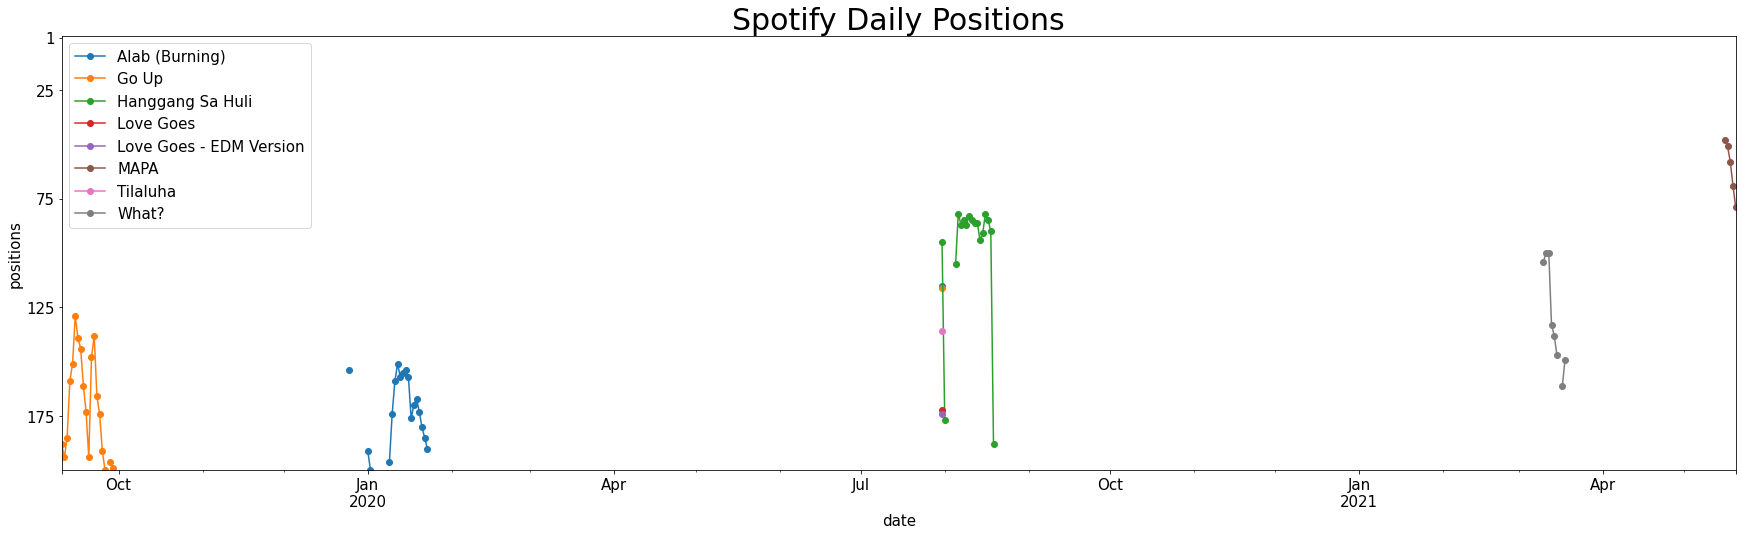

In [10]:
#To eyeball-verify virality: line chart of daily positions 

fig= plt.figure(figsize=(30,8))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = date_index_df[date_index_df['track_name_x']=='Alab (Burning)']['position'].resample('D').min()
data2 = date_index_df[date_index_df['track_name_x']=='Go Up']['position'].resample('D').min()
data3 = date_index_df[date_index_df['track_name_x']=='Hanggang Sa Huli']['position'].resample('D').min()
data4 = date_index_df[date_index_df['track_name_x']=='Love Goes']['position'].resample('D').min()
data5 = date_index_df[date_index_df['track_name_x']=='Love Goes - EDM Version']['position'].resample('D').min()
data6 = date_index_df[date_index_df['track_name_x']=='MAPA']['position'].resample('D').min()
data7 = date_index_df[date_index_df['track_name_x']=='Tilaluha']['position'].resample('D').min()
data8 = date_index_df[date_index_df['track_name_x']=='What?']['position'].resample('D').min()

data1.plot(ax=ax, label='Alab (Burning)', kind='line', marker='o')
data2.plot(ax=ax, label='Go Up', kind='line', marker='o')
data3.plot(ax=ax, label='Hanggang Sa Huli', kind='line', marker='o')
data4.plot(ax=ax, label='Love Goes', kind='line', marker='o')
data5.plot(ax=ax, label='Love Goes - EDM Version', kind='line', marker='o')
data6.plot(ax=ax, label='MAPA', kind='line', marker='o')
data7.plot(ax=ax, label='Tilaluha', kind='line', marker='o')
data8.plot(ax=ax, label='What?', kind='line', marker='o')

#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.ylim([200,0])
plt.yticks([1]+np.arange(25,201,50).tolist())
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.legend(loc=2, fontsize=15)
plt.ylabel('positions', fontsize = 15)
plt.xlabel('date',fontsize=15)
plt.title('Spotify Daily Positions', fontsize=30)